In [15]:
import pandas as pd

In [16]:
antique = pd.read_csv('../Data/ANTIQUE/antique-collection.txt', delimiter='\t', header=None, names=['ID', 'Text'])

In [17]:
antique.sample(5)

,ID,Text
218858,1150829_12,Can't stand him. He's nothing but a liar and ...
142836,3300268_0,"Large workforce, easy conscription of a army. ..."
254561,1595932_3,There is a cream separator that spins it prett...
86711,1623209_2,add four sides together. example. . 4+9+4+9 = ...
392747,1905612_10,How do you know exactly how a person is a Chri...


In [18]:
antique[['ID1', 'ID2']] = antique['ID'].str.split('_', expand=True)

In [19]:
antique['ID1'] = antique['ID1'].astype(int)
antique['ID2'] = antique['ID2'].astype(int)

In [20]:
antique.sample(5)

,ID,Text,ID1,ID2
234963,3779857_1,"In terms of molecular weight, water would be H...",3779857,1
55226,2763194_7,Per an accountant friend of mine it takes 6 ye...,2763194,7
270332,1642518_1,becuase of the reaction it has to drying and s...,1642518,1
219486,3199638_18,"yeah, actually I do....",3199638,18
279260,1317844_0,"Buffalo is in upstate NY, western NY to be exact.",1317844,0


In [21]:
antique.groupby('ID1')['ID2'].count()

ID1
29         11
66          7
95          4
170         2
192         5
           ..
4482703     4
4482782     4
4482840     7
4482936    10
4482988     3
Name: ID2, Length: 66612, dtype: int64

In [22]:
print(antique[antique['ID1']==170])

          ID                                               Text  ID1  ID2
71693  170_0  To me its a metaphor for the struggle between ...  170    0
71694  170_1                             Tigers are brave guys.  170    1


In [23]:
train_queries = pd.read_csv('../Data/ANTIQUE/antique-train-queries.txt', delimiter='\t', header=None, names=['ID', 'Query'])

In [24]:
train_queries.sample(5)

,ID,Query
382,3922248,What is the sqare root of -16?
2234,664886,"Atheists, Why only go after Christianity?"
919,1433442,What's the difference between a cabbage?
2115,1557632,What is a peanut if it isn't a nut?
1964,1582044,how/do tarot cards work?


In [25]:
train_queries.shape

(2426, 2)

In [26]:
test_queries = pd.read_csv('../Data/ANTIQUE/antique-test-queries.txt', delimiter='\t', header=None, names=['ID', 'Query'])

In [27]:
test_queries.sample(5)

,ID,Query
67,558570,"My city just put a ban on pit bulls, how do we..."
115,2018562,"Why does my Black Lab howl to ""Law and Order"" ..."
136,224109,what is citriscidal?
135,354733,What are the names of some famous photographer...
159,2443586,What is a Bro?


In [28]:
test_queries.shape

(200, 2)

In [39]:
train_rel = pd.read_csv('../Data/ANTIQUE/antique-train.qrel', delimiter='\s+', header=None, names=['QueryID', 'Type', 'PassageID', 'Label'])

In [40]:
train_rel.sample(5)

,QueryID,Type,PassageID,Label
3510,3752962,Q0,3752962_0,4
9609,2362256,Q0,2362256_3,2
13094,1388368,Q0,1388368_7,2
17547,29946,Q0,29946_2,4
23838,2112535,Q0,2112535_5,1


In [41]:
train_rel.shape

(27422, 4)

In [42]:
test_rel = pd.read_csv('../Data/ANTIQUE/antique-test.qrel', delimiter='\s+', header=None, names=['QueryID', 'Type', 'PassageID', 'Label'])

In [43]:
test_rel.sample(5)

,QueryID,Type,PassageID,Label
3819,3554263,Q0,3554263_5,3
3803,456214,Q0,2543207_7,4
2850,1459749,Q0,3721778_7,1
5237,1292734,Q0,2778901_0,1
6299,8293,Q0,3990173_5,2


In [44]:
test_rel.shape

(6589, 4)

In [47]:
import matplotlib.pyplot as plt

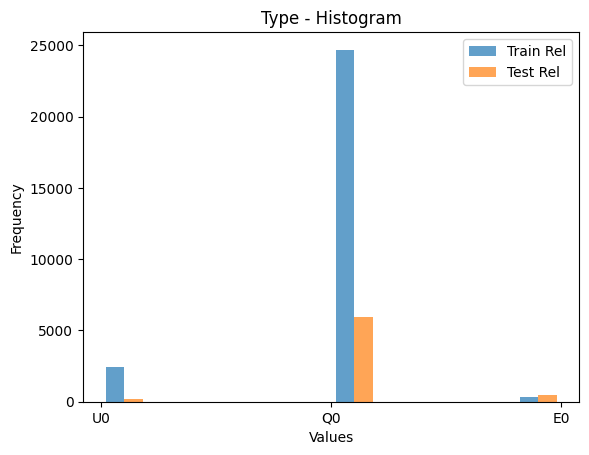

In [50]:
plt.hist([train_rel['Type'], test_rel['Type']], alpha=0.7, label=['Train Rel', 'Test Rel'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Type - Histogram')

# Add legend
plt.legend()

# Show the plot
plt.show()

U0, Q0, and E0 are the three main components of the ANTIQUE queries dataset.

U0: The user query, which is the natural language question that the user asked.

Q0: The query that was submitted to the search engine, which may have been modified from the user query to be more compatible with the search engine's query syntax.

E0: The search engine's response to the query, which is a list of URLs to documents that the search engine believes are relevant to the query.

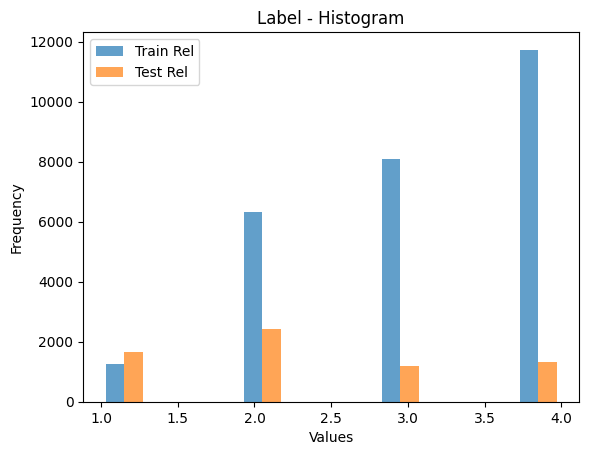

In [51]:
plt.hist([train_rel['Label'], test_rel['Label']], alpha=0.7, label=['Train Rel', 'Test Rel'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Label - Histogram')

# Add legend
plt.legend()

# Show the plot
plt.show()

Label 4: It looks reasonable and convincing. Its quality is on par
with or better than the “Possibly Correct Answer”. Note that
it does not have to provide the same answer as the “Possibly
Correct Answer”.

Label 3: It can be an answer to the question, however, it is not
sufficiently convincing. There should be an answer with much
better quality for the question.

Label 2: It does not answer the question or if it does, it provides an
unreasonable answer, however, it is not out of context. Therefore,
you cannot accept it as an answer to the question.

Label 1: It is completely out of context or does not make any
sense.